<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ウィスコンシン乳癌データセット" data-toc-modified-id="ウィスコンシン乳癌データセット-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ウィスコンシン乳癌データセット</a></span></li><li><span><a href="#乳癌データの読み込み" data-toc-modified-id="乳癌データの読み込み-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>乳癌データの読み込み</a></span><ul class="toc-item"><li><span><a href="#特徴量" data-toc-modified-id="特徴量-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>特徴量</a></span></li><li><span><a href="#目的変数" data-toc-modified-id="目的変数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>目的変数</a></span></li><li><span><a href="#教師データを学習用とテスト用に分割" data-toc-modified-id="教師データを学習用とテスト用に分割-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>教師データを学習用とテスト用に分割</a></span></li></ul></li><li><span><a href="#ランダムフォレストでモデル作成" data-toc-modified-id="ランダムフォレストでモデル作成-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ランダムフォレストでモデル作成</a></span><ul class="toc-item"><li><span><a href="#予測" data-toc-modified-id="予測-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>予測</a></span></li></ul></li><li><span><a href="#モデル評価" data-toc-modified-id="モデル評価-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>モデル評価</a></span><ul class="toc-item"><li><span><a href="#混合行列（confusion-matrix)" data-toc-modified-id="混合行列（confusion-matrix)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>混合行列（confusion matrix)</a></span></li><li><span><a href="#正解率（Accuracy)" data-toc-modified-id="正解率（Accuracy)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>正解率（Accuracy)</a></span></li><li><span><a href="#適合率（Precision）" data-toc-modified-id="適合率（Precision）-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>適合率（Precision）</a></span></li><li><span><a href="#再現率（recall）" data-toc-modified-id="再現率（recall）-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>再現率（recall）</a></span></li><li><span><a href="#F値（F-Measure）" data-toc-modified-id="F値（F-Measure）-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>F値（F-Measure）</a></span></li><li><span><a href="#閾値の制御" data-toc-modified-id="閾値の制御-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>閾値の制御</a></span></li><li><span><a href="#ROC曲線（Receiver-Operating-Characteristic）とAUC（Area-Under-the-Curve）" data-toc-modified-id="ROC曲線（Receiver-Operating-Characteristic）とAUC（Area-Under-the-Curve）-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>ROC曲線（Receiver Operating Characteristic）とAUC（Area Under the Curve）</a></span></li><li><span><a href="#Log-Loss（Logarithmic-Loss：ログ損失）" data-toc-modified-id="Log-Loss（Logarithmic-Loss：ログ損失）-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Log Loss（Logarithmic Loss：ログ損失）</a></span></li></ul></li><li><span><a href="#LightGBMによる精度向上" data-toc-modified-id="LightGBMによる精度向上-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LightGBMによる精度向上</a></span></li><li><span><a href="#scikit-learnの便利機能" data-toc-modified-id="scikit-learnの便利機能-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>scikit-learnの便利機能</a></span></li></ul></div>

# 2クラス分類におけるビジネス評価基準

## ウィスコンシン乳癌データセット
乳房塊の微細針吸引物（FNA）のデジタル化画像中に存在する細胞核の情報を特徴量とし、良性（Benign）と悪性（Malignant）に分類する

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:
# warningの抑止
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
# matplotの日本語表示
from matplotlib import pyplot as plt

# 最大表示行数
pd.set_option('display.max_rows', 250)

# 最大表示列数
pd.set_option('display.max_columns', 250)

warnings.filterwarnings('ignore')

## 乳癌データの読み込み

In [2]:
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
type(breast_cancer)

sklearn.utils.Bunch

### 特徴量

In [3]:
# 569件のデータ、30個の特徴量
print(breast_cancer.data.shape, "\n")
print(breast_cancer.feature_names, "\n")
print(breast_cancer.data)

(569, 30) 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


各特徴量の意味は
1. mean radius 平均半径
2. mean texture テクスチャをグレースケールにした際の平均
3. mean perimeter 平均外周の長さ
4. mean area 平均面積
5. mean smoothness 平均なめらかさ（半径の分散）
6. mean compactness 外周長さ^2 / 面積 - 1.0で示すコンパクトさ平均
7. mean concavity 輪郭の凹部の重要度の平均
8. mean concave points 輪郭の凹部の数の平均
9. mean symmetry 対称性
10. mean fractal dimension フラクタル次元の平均
11. radius error 半径誤差
12. texture error テクスチャの誤差
13. perimeter error 外周の誤差
14. area error 面積の誤差
15. smoothness error なめらかさの誤差
16. compactness error コンパクトさの誤差
17. concavity error 輪郭の凹部の重要度の誤差
18. concave points error 輪郭の凹部の数の誤差
19. symmetry error 対称性の誤差
20. fractal dimension error フラクタル次元の誤差
21. worst radius 半径最悪値
22. worst texture テクスチャ最悪値
23. worst perimeter 外周の長さ最悪値
24. worst area 面積の最悪値
25. worst smoothness なめらかさの最悪値
26. worst compactness コンパクトさの最悪値
27. worst concavity 輪郭の凹部の重要度の最悪値
28. worst concave points 輪郭の凹部の数の最悪値
29. worst symmetry 対称性の最悪値
30. worst fractal dimension フラクタル次元の最悪値

https://ensekitt.hatenablog.com/entry/2018/08/22/200000

### 目的変数

In [4]:
print(breast_cancer.target_names)
print(breast_cancer.target[-5:])

['malignant' 'benign']
[0 0 0 0 1]


### 教師データを学習用とテスト用に分割

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                    breast_cancer.target,
                                                    random_state=1234)

## ランダムフォレストでモデル作成

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 予測

In [7]:
y_pred = clf.predict(X_test)

## モデル評価

２クラス分類問題の場合、２つのクラスを  
・**陽性**  
・**陰性**  
と呼び、一般に、当てたいクラスを陽性と呼ぶ。  

乳癌データの場合  
・陽性=癌の疑い  
・陰性=健康  
となる。  

機械学習を利用する場合、**正確な予測だけが目的とならない場合がある。**  
モデルの高レベルでの目的（ビジネス評価基準）を見失ってはいけない。

乳癌検査の分類の場合、**最も防ぐべき事は癌患者を陰性と判定する事**である。  
健康な患者を陽性(癌の疑い）と判定する事は、余分な検査が増える事になるが**生命の危険に比べれば許容される誤り**である。

統計学では  
**偽陽性(false positive)**：間違って陽性と判定する事  
**偽陰性(false negative)**：間違って陰性と判定する事  

**真陽性(true positive)**：正しく陽性と判定する事  
**真陰性(true negative)**：正しく陰性と判定する事  

という呼ぶ。  
<font color="red">**癌の診断例では、偽陰性を可能な限り避ける事がビジネス評価基準**</font>  
となる。

また、偏ったデータの場合も正確な予測がビジネス評価基準にはならない場合が多い。    
例えば、100回表示されて、1回クリックされる広告があった場合、全てクリックされないと予測すれば正解率は99%となるからである。

### 混合行列（confusion matrix)

2クラス分類の評価結果を表現する方法として、混合行列（confusion matrix)がある。  

![混合行列](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/70152/29cc37e7-ff2e-d781-d4a4-e328fd7526a1.png)

sklearnには混合行列が用意されているが、一般的な表記方法と陰性、陽性の表記順が逆転しており、

|-|予測-陰性|予測-陽性|
|---|:---:|---:|
|**真実-陰性**|True Negative|False Positive|
|**真実-陽性**|False Positive|True Positive|

と出力される。  
一般的な表記は

|-|予測-陽性|予測-陰性|
|---|:---:|---:|
|**真実-陽性**|TP|FN|
|**真実-陰性**|FP|TN|

In [8]:
from sklearn.metrics import confusion_matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                                   index=["真実-陰性", "真実-陽性"],
                                   columns=["予測-陰性", "予測-陽性"])
df_confusion_matrix

,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86


### 正解率（Accuracy)

正しく分類できた割合（偏りがある場合は、当てにならない）

$$
    正解率 = \frac{TP + TN}{TP ＋TN ＋FP + FN}
$$

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9230769230769231

In [10]:
df_confusion_matrix

,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86


In [11]:
(49 + 86) / (49 + 6 + 2 + 86)

0.9440559440559441

### 適合率（Precision）

PPV(positive predictive value：陽性的中率)とも呼ばれ、予想の正確性を重視する指標であり、FP(偽陽性）を最小にする事が目的となる。  
新薬の臨床試験結果などで重視される。（薬が効くと予想し、実際に効いていれば良い薬）

$$
    適合率 = \frac{TP}{TP ＋ FP}
$$

In [12]:
from sklearn.metrics import precision_score

precision_score = precision_score(y_test, y_pred)
precision_score

0.9052631578947369

In [13]:
df_confusion_matrix

,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86


In [14]:
86 / (6 + 86)

0.9347826086956522

### 再現率（recall）

真実の陽性サンプルに対して予測が高めたい場合の指標。FN（偽陰性）を最小する事が目的とになる。  
即ち、分かりにくいものは基本的に陽性と判断したい場合の予想の正確性を図る指標。

乳癌の例ででは、疑わしきものは陽性と判定するので、再現率を重視すれば発見漏れリスクが少なくなる

$$
    再現率 = \frac{TP}{TP ＋ FN}
$$

In [15]:
from sklearn.metrics import recall_score

recall_score = recall_score(y_test, y_pred)
recall_score

0.9772727272727273

In [16]:
df_confusion_matrix

,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86


In [17]:
86 / (2 + 86)

0.9772727272727273

再現率とはトレードオフの関係にある。  
全てのサンプルを陽性と判断すれば FN=0となり再現率は100%になるが、一方で FPが大きくなる適合率は下がる為である。  
逆の場合はイメージが付きにくいが下記の説明が分かりやすい。


https://blog.amedama.jp/entry/2017/12/18/005311

### F値（F-Measure）

適合率と再現率はトレードオフの関係にある為、データの偏りと共に適合率、再現率の両方を気にしたい場合は、適合率と再現率の調和平均を使う。  
（ｆ1-値とも呼ばれる）

$$
    F = 2 \times \frac{適合率\times再現率}{適合率＋再現率}
$$

In [18]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1

0.9398907103825138

In [19]:
2 * (precision_score * recall_score) / (precision_score + recall_score)

0.9398907103825138

### 閾値の制御

scikit-learnのクラス分類器の殆どは、  
・**decision_function**  
・**predict_proba**  
関数が用意されている。

decision_functionは予測の閾値を制御し、predict_probaは予測の確率が確認できる。  

デフォルトでは  
・decision_function：0  
・predict_proba：0.5  
である。


predict_probaの場合、[陰性の確立、陽性の確率]となる。

In [20]:
# randomForestにはdecision_functionない
# clf.decision_function(X_test)

# [陰性の確立、陽性の確率]
clf.predict_proba(X_test)[:5]

array([[0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ]])

RrandomForestにはdecision_functionないが、下記のようにコーディングすることで確率の閾値を制御できる。  
乳癌の例の場合、再現率を重視したいので、陽性への判定を緩くする。

In [21]:
# 確率が0.5より小さいならば陰性と判断
new_y_pred_1 = (clf.predict_proba(X_test)[:, 0] < 0.5).astype(int)

In [22]:
# なぜかimportしないとダメ・・・
from sklearn.metrics import recall_score

# 確率が0.5ならば陰性と判断
new_y_pred_1 = (clf.predict_proba(X_test)[:, 0] < 0.5).astype(int)
new_y_pred_2 = (clf.predict_proba(X_test)[:, 0] < 0.6).astype(int)
new_y_pred_3 = (clf.predict_proba(X_test)[:, 0] < 0.7).astype(int)
new_y_pred_4 = (clf.predict_proba(X_test)[:, 0] < 0.8).astype(int)

print(recall_score(y_test, new_y_pred_1))
print(recall_score(y_test, new_y_pred_2))
print(recall_score(y_test, new_y_pred_3))
print(recall_score(y_test, new_y_pred_4))

0.9772727272727273
0.9772727272727273
0.9886363636363636
1.0


### best_threshold =  0.7000000000000001


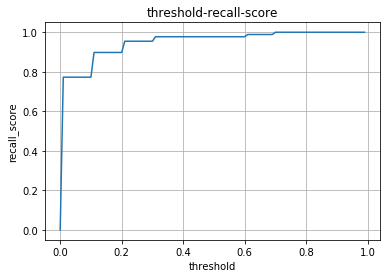

In [23]:
_threshold = np.arange(0, 1, 0.01)
_recall_score = []
best_threshold = 0

for p in _threshold:
    p_pred = (clf.predict_proba(X_test)[:, 0] < p).astype(int)
    score = recall_score(y_test, p_pred)

    # recall=1.0となる最小閾値を決定    
    if (score == 1.0 and best_threshold == 0):
        best_threshold = p

    _recall_score.append(score)

print("### best_threshold = ", best_threshold)

plt.plot(_threshold, _recall_score)

plt.title('threshold-recall-score')
plt.xlabel('threshold')
plt.ylabel('recall_score')
plt.grid(True)

In [24]:
# 閾値変更前
df_confusion_matrix

,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86


In [25]:
# 閾値変更後
pd.DataFrame(confusion_matrix(y_test, new_y_pred_3),
             index=["真実-陰性", "真実-陽性"],
             columns=["予測-陰性", "予測-陽性"])

,予測-陰性,予測-陽性
真実-陰性,43,12
真実-陽性,1,87


RandomForestにはdecision_functionがない為（class_weightパラメータで制御？）SVMで試してみる。

２値クラスの場合、境界に位置するごく一部の訓練データのみが決定境界を決定する。  
これらのデータを**サポートベクタ**と呼ぶ。

SVMの主要パラメータはCとgamma
- C：線形モデルと同様に、小さい程個々のサンプルが与える影響力を弱くする。
- ganma：小さい程ガウシアンカーネルの直径が大きくなり、多くの点を近いと判断する

In [26]:
from sklearn.svm import SVC

# kernel=rgb（radical basis function:放射基底関数）
svc = SVC(kernel='rbf', C=10, gamma=0.1)
svc

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVMはスケールに対して非常に敏感なので、スケール変換をしてやる  
SVMでは標準化(StandardScaler)よりも、正規化（MinMaxScaler）の方が精度が良くなる傾向あり

In [27]:
from sklearn.preprocessing import MinMaxScaler

# 正規化
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
svc.fit(X_train_scaled, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
svc_pred = svc.predict(scaler.fit_transform(X_test))

df_confusion_matrix_svc = pd.DataFrame(confusion_matrix(y_test, svc_pred),
                                   index=["真実-陰性", "真実-陽性"],
                                   columns=["予測-陰性", "予測-陽性"])

df_confusion_matrix_svc

,予測-陰性,予測-陽性
真実-陰性,50,5
真実-陽性,1,87


decision_functionは、分離超平面からの符号付き距離を返す  
正が陽性の確信度、負が陰性の確信度であり、超平面から遠ければ遠いほど、確信度が上がる

In [29]:
svc.decision_function(scaler.fit_transform(X_test))[-5:]

array([ 3.30746098, -1.86854228,  5.25067211, -5.91461654, -1.61722622])

### ROC曲線（Receiver Operating Characteristic）とAUC（Area Under the Curve）

陽性サンプルの中で本当に陽性だった割合をTP率
$$
    TP率 = \frac{TP}{TP+FN}
$$

陰性サンプルの中で間違って陽性とだ判定した割合をFP率

$$
    FP率 = \frac{FP}{TN＋FP}
$$

とする。  
ROC曲線とは閾値ρを変更した際の(FP率, TP率）を2次元にプロットした曲線  

例）赤：陽性、緑：陰性 の場合

![閾値設定](https://mathwords.net/wp-content/uploads/2019/01/auc3-300x176.png)

閾値ρ=0.75  とすると、本当に陽性のもの（AとB）の中で正しく陽性とみなせたもの（A）の割合は、TP率＝1/2。    
一方、本当に陰性のもの（C、D、E、F）の中で間違って陽性とみなしたもの（C）の割合は、FP率＝1/4 。

ρ=0.75の時の（FP率,TP率）＝(1/4,1/2) をプロット

![ROC曲線](https://mathwords.net/wp-content/uploads/2019/01/auc4-300x199.png)

![混合行列](https://techblog.gmo-ap.jp/wp-content/uploads/2018/09/Screen-Shot-2018-09-11-at-20.29.58.png)
閾値ρ＝1とは全て陰性と見なす事であり、TP＝FP＝0 となる為、（TP率、FP率）＝ (0,0) となる。  
閾値ρ＝0とは全て陽性と見なす事であり、FP＝TN＝0 となる為、（TP率、FP率）＝（1,1）となる。  
TP率が上がればFP率も上がる関係になるのは上図が分かりやすい。

予測で最も望ましい状態は、TP率が高くて、FP率が低い事。  
（陽性と陰性のそれぞれの予測分布が離れている状態）  

その為には、閾値ρが低い段階でTP率が上がり切る事であり、AUC(Area Under the Curve) はROC曲線の下の面積の事で、面積が大きいほど予測精度が良い事を意味する。

![AUC](https://mathwords.net/wp-content/uploads/2019/01/auc5-300x203.png)

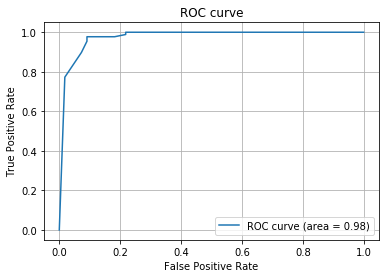

In [30]:
from sklearn.metrics import auc, roc_curve

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1] )

# AUCも
auc = auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Log Loss（Logarithmic Loss：ログ損失）

F値やAUCが同じでも確信度が高い（自信を持って陽性・陰性と判断している）方が良いモデル  
予測された確率とその結果の乖離を交差エントロピーの最小化を利用して確信度を測る指標  

- y:予測値（０ or 1）  
- p:予測確率

とすると、交差エントロピーは
$$ 
    −(ylogp+(1−y)log(1−p)) 
$$

であり、log lossは、サンプル中の全ての交差エントロピーの平均を取ることによって計算される。

$$
-\frac{1}{N} \sum_{i=1}^N((y_i {\log} p_i+(1-y_i){\log}(1-p_i))
$$

log lossはモデルが良い程、値が０になる。

In [31]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred)

2.6568792777684567

## LightGBMによる精度向上

[LightGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)にてモデル精度を比較してみる

In [32]:
import lightgbm as lgb

lgb_cls = lgb.LGBMClassifier()
lgb_cls

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'num_leaves': [10, 31, 50],
    'max_depth': [-1, 3, 5, 10]
}

# grid searching
gscv = GridSearchCV(
    estimator=lgb_cls,
    param_grid=params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
)
gscv.fit(X_train, y_train)

# print results
print('### best parameters', gscv.best_params_)
print('### best f1 score:', gscv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s


### best parameters {'max_depth': -1, 'num_leaves': 31}
### best f1 score: 0.9739861191622604


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.0s finished


結局、デフォルトが一番良かった

In [34]:
from sklearn.metrics import f1_score, log_loss

lgb_cls_pred = gscv.best_estimator_.predict(X_test)
print("### f1 score ={}".format(f1_score(y_test, lgb_cls_pred)))
print("### log loss ={}".format(log_loss(y_test, lgb_cls_pred)))

### f1 score =0.9565217391304348
### log loss =1.9322839715994902


F値、Log LossともRandomForestよりちょっとだけ良い。

## scikit-learnの便利機能

 scikit-learnには、適合率、再現率、F値を一括で出力してくれる **classification_report**関数がある。  
 戻り値がstringなのでが、DataFrameに変換はできない。  
 
 **陽性**行が上述の適合率、再現率、F値となる。（supportはそのクラスのサンプル数）

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["陰性", "陽性"]))

df_confusion_matrix

              precision    recall  f1-score   support

          陰性       0.96      0.84      0.89        55
          陽性       0.91      0.98      0.94        88

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.93      0.92      0.92       143



,予測-陰性,予測-陽性
真実-陰性,46,9
真実-陽性,2,86
